In [435]:
!git add "td5_ressources/"
!git add "TD5_A_Simple_NN_for_a_Simple_LR.ipynb"

In [436]:
!git commit -m "reshaping TD5"
!git push origin master

[master 9a4bba6] reshaping TD5
 1 file changed, 27 insertions(+), 12 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 550 bytes | 550.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/Luc-Bertin/TDs_ESILV.git
   7e147bb..9a4bba6  master -> master


# TD5 • Coding a simple perceptron with Backprop

<h3> Un <a href="http://playground.tensorflow.org/#activation=linear&regularization=L1&batchSize=29&dataset=gauss&regDataset=reg-plane&learningRate=0.001&regularizationRate=0.003&noise=15&networkShape=1&seed=0.37334&showTestData=true&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">lien sympathique</a> pour s'amuser avec différentes architectures de réseau de neurones </h3>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A scalar

In [19]:
scalar = 4
scalar2 = np.array(4)
scalar, scalar2, scalar2.shape

(4, array(4), ())

# A vector

## Creation

In [54]:
vector_1D = np.array([4])
vector_1D_of_multiple_elements = np.array([1,2,3,4,5,6])

print(vector_1D, vector_1D_of_multiple_elements)
print(vector_1D.shape, vector_1D_of_multiple_elements.shape)
print(vector_1D.ndim, vector_1D_of_multiple_elements.ndim)

# Number of elements in the array
print(vector_1D.size, vector_1D_of_multiple_elements.size)

[4] [1 2 3 4 5 6]
(1,) (6,)
1 1
1 6


## Transpose vector

In [43]:
(vector_1D_of_multiple_elements.T,
 vector_1D_of_multiple_elements.T.shape) # same thing (in terms of representation)

(array([1, 2, 3, 4, 5, 6]), (6,))

In [44]:
(vector_1D_of_multiple_elements, 
vector_1D_of_multiple_elements.shape,
vector_1D_of_multiple_elements.ndim)

(array([1, 2, 3, 4, 5, 6]), (6,), 1)

# A matrix

## creation

In [39]:
matrix = np.array( [ 
            [ 1,2,3], 
            [ 4,5,6]
          ])

In [55]:
matrix, matrix.shape, matrix.ndim, matrix.size

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3),
 2,
 6)

## transpose matrix

In [56]:
matrix.T, matrix.T.shape, matrix.T.ndim, matrix.size

(array([[1, 4],
        [2, 5],
        [3, 6]]),
 (3, 2),
 2,
 6)

# Re-shape a vector or matrix

In [82]:
vector_1D.size

1

In [86]:
vector_1D.reshape((1,1))

array([[4]])

In [87]:
vector_1D.reshape((1,1,1))

array([[[4]]])

In [88]:
vector_1D_of_multiple_elements.size

6

In [89]:
vector_1D_of_multiple_elements.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [90]:
vector_1D_of_multiple_elements.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

## pd.DataFrame

In [91]:
pd.DataFrame(vector_1D)

,0
0,4


In [92]:
pd.DataFrame(vector_1D_of_multiple_elements)

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [93]:
pd.DataFrame(matrix)

,0,1,2
0,1,2,3
1,4,5,6


In [94]:
pd.DataFrame(vector_1D_of_multiple_elements) 

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [95]:
pd.DataFrame(vector_1D_of_multiple_elements.T)

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [96]:
pd.DataFrame(vector_1D_of_multiple_elements).shape

(6, 1)

In [97]:
pd.DataFrame(vector_1D_of_multiple_elements).T

,0,1,2,3,4,5
0,1,2,3,4,5,6


# Vector "as" matrix

In linear algebra, a **column vector** or **column matrix** is an **m × 1 matrix**, that is, a **matrix consisting of a single column of m elements**

In [120]:
as_matrix = vector_1D_of_multiple_elements.reshape(6, 1) # 6 rows, 1 column

In [121]:
pd.DataFrame(as_matrix)

,0
0,1
1,2
2,3
3,4
4,5
5,6


Similarly, a row vector or row matrix is a 1 × m matrix, that is, a matrix consisting of a single row of m elements

In [123]:
as_matrix = vector_1D_of_multiple_elements.reshape(1, 6) # 1 column, 6 rows

In [124]:
pd.DataFrame(as_matrix)

,0,1,2,3,4,5
0,1,2,3,4,5,6


# Dot Product (produit scalaire)

In [125]:
vector1 = np.array([1,2,3,4,5])
vector2 = np.array([2,4])

In [126]:
try:
    np.dot( vector1, vector2 )
except:
    print("Not the same number of elements to perform a dot product (must be aligned)")

Not the same number of elements to perform a dot product (must be aligned)


In [127]:
vector2 = np.array([2,4,1,1,1])

In [128]:
np.dot(vector1, vector2) # 1*2 + 2*4 + 3*1 + 4*1 + 5*1

22

In [131]:
try:
    np.dot(vector1.reshape(1,5), vector2.reshape(1,5))
except:
    print("Again, not aligned because in maths you do the transpose of the vector1 ")

Again, not aligned because in maths you do the transpose of the vector1 


<img src="td5_ressources/dot product.png" width="100%">

In [143]:
# this works
result_dot_product = np.dot(vector1.reshape(1,5), vector2.reshape(1,5).T)
# this works
result_matrix_product = np.matmul(vector1.reshape(1,5), vector2.reshape(1,5).T)
# same result
result_dot_product, result_matrix_product

(array([[22]]), array([[22]]))

# elementwise multiplication (Hadamard Product on Matrices (or column/row vector)
To not confuse with dot product:

In [147]:
vector1 * vector2 # vector of element multiplications

array([2, 8, 3, 4, 5])

In [148]:
# same result
np.multiply(vector1, vector2)

array([2, 8, 3, 4, 5])

In [152]:
np.multiply(vector1.reshape(1,5), vector2.reshape(1,5))

array([[2, 8, 3, 4, 5]])

# Broadcasting rules numpy

refers to how numpy **treats arrays** with **different shapes** during **arithmetic operations**.<br>
Subject to certain constraints, the **smaller array is “broadcast” across the larger array** so that they have compatible shapes!

* Same shapes, no problem:

In [167]:
vector1 = np.array([1,2,3])
vector2 = np.array([1,2,3])

vector1 + vector2

array([2, 4, 6])

* different shapes, what to do ? 

<u>**Example1:**</u>

In [176]:
vector1 = np.array([1])
vector2 = np.array([1,2,3])
vector1.shape, vector2.shape

((1,), (3,))

In [177]:
vector1 + vector2

array([2, 3, 4])

This is the same thing as:

In [183]:
vector1_transformed = np.tile(vector1, reps=(1,3))
print( vector1_transformed )

vector1_transformed + vector2

[[1 1 1]]


array([[2, 3, 4]])

<img src="td5_ressources/broadcoast1.png" width="100%">

> from https://cs231n.github.io/python-numpy-tutorial/#numpy-broadcasting:
* If the arrays do not have the same rank (number of dimensions), **prepend the shape of the lower rank array** with **1s until both shapes have the same length**.
* The two arrays **are said to be compatible** in **a** dimension if they have the **same size** in the dimension, or if one of the arrays **has size 1** in **that** dimension.
* The arrays can be broadcast together if they **are compatible in all dimensions**.


After broadcasting:
* After broadcasting, each array **behaves as if it had shape equal to the elementwise maximum of shapes** of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves **as if it were copied along that dimension**.

In [196]:
vector1 = np.array([[1]])
vector2 = np.array([1,2,3])
vector1.shape, vector2.shape

((1, 1), (3,))

prepending ones, the last dimension of the array will be "strecthed" so the number of elements match with the one of the first array

In [197]:
vector1 + vector2

array([[2, 3, 4]])

<u>**Example2:**</u>

In [236]:
vector1 = np.array([[1], [2]]) # 2 rows, 1 column
vector2 = np.array([1,2,3]) # 1D vector
vector1.shape, vector2.shape

((2, 1), (3,))

1. 2 rows in `vector1`, `vector2` does not have "rows dimension", prepended a 1 to create a new dimension
2. then `vector2` is stretched on its new dim so to have 2 elements, as `vector1` 
3. while `vector1` has last dimensions (columns) strecthed to have 3 elements, as `vector2`

In [237]:
vector1 + vector2 

array([[2, 3, 4],
       [3, 4, 5]])

This is the same as:

In [241]:
vector2

array([1, 2, 3])

In [242]:
np.tile(vector2, reps=(2, 1))

array([[1, 2, 3],
       [1, 2, 3]])

In [243]:
np.tile(vector1, reps=(1, 3))

array([[1, 1, 1],
       [2, 2, 2]])

<u>**Example3:**</u>

In [260]:
vector1 = np.array([[1, 4, 5], [2, 2, 5]]) # 2 rows, 1 column
vector2 = np.array([1, 2]) # 1D vector
vector1.shape, vector2.shape

((2, 3), (2,))

In [263]:
try:
    vector1 + vector2
except Exception as e:
    print("After prepending with 1 the vector2, impossible to match 2 to 3:\n{}".format(e))

After prepending with 1 the vector2, impossible to match 2 to 3:
operands could not be broadcast together with shapes (2,3) (2,) 


# Finding the parameters in a simple linear regression case

## The data

In [265]:
%matplotlib inline

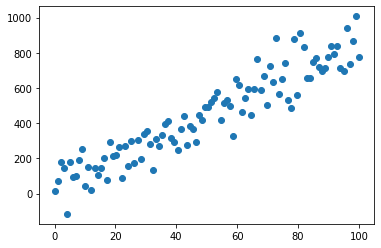

In [278]:
x = np.linspace(0, 100, 100)
y = 8*x + np.random.normal(x, 100) # y = 8*x + epsilon with epsilon ~ N(0,1)
plt.scatter(x, y)
plt.show()

How to find the coefficient $\beta$s (here the intercept $\beta$0 and the slope $\beta$1) in order to have the best fitting (simple) linear model ? 

## The plotting function

In [401]:
def plotting(beta0, beta1):
    plt.scatter(x_scaled_and_centered, y)
    plt.plot(x_scaled_and_centered, lm.intercept_ + lm.coef_ * x_scaled_and_centered, color='r')

## Using OLS

In [281]:
from sklearn.linear_model import LinearRegression
# adding one dimension to the x (to have a feature matrix notation,
# although x is only 1 feature,
# which then can be apparented as a column vector
lm = LinearRegression().fit(x[:, np.newaxis], y)
lm.intercept_, lm.coef_

(37.18580177143173, array([8.22801749]))

With standardization before:

In [293]:
from sklearn.preprocessing import StandardScaler
x_scaled_and_centered = StandardScaler().fit_transform(x[:, np.newaxis])
lm = LinearRegression(fit_intercept=True).fit(x_scaled_and_centerd, y)
lm.intercept_, lm.coef_

(448.5866764712714, array([239.90962559]))

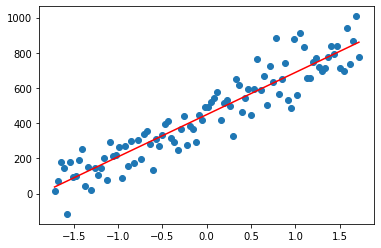

In [402]:
plotting(lm.intercept_, lm.coef_)

## Using a self-made (definitely non-optimised) algorithm

In [387]:
def algo_simple_linreg(x, y):
    """A self-made, definitely non-optimised algorithm to find the best alpha and beta values:"""
    from sklearn.metrics import mean_squared_error
    MSE = {}
    for beta0 in np.linspace(-5000, 5000, 100):
        for beta1 in np.linspace(-5000, 5000, 100):
            model = lambda x: beta0 + beta1*x
            mse = mean_squared_error( model(x), y)
            MSE[(beta0, beta1)] = mse
    return MSE

In [389]:
MSE = algo_simple_linreg(x_scaled_and_centered, y)

In [390]:
params = pd.Series(MSE).unstack()

<AxesSubplot:>

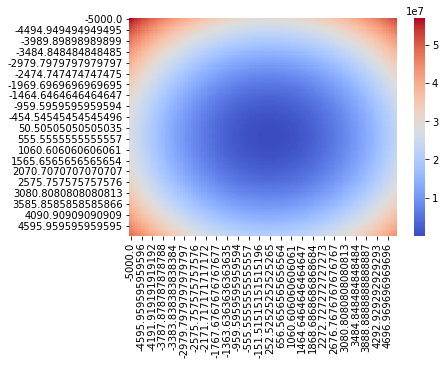

In [391]:
import seaborn as sns
ax = plt.subplot(111)
sns.heatmap(params, cmap="coolwarm", ax=ax)

In [400]:
params.stack().idxmin()

(454.54545454545496, 252.52525252525265)

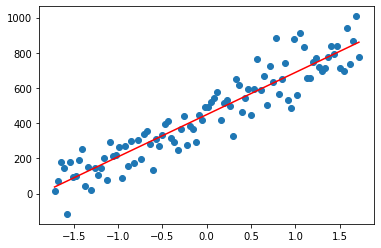

In [403]:
plotting(*params.stack().idxmin())

## Using One neuron 🤓

###  Definition

2 nice definitions i like, just stolen from [there](https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/Slides/MLP-NeuralNetworks_course_2pp.pdf)

> A **processing “unit”** applying a **simple operation to its inputs**, and which can be **“connected” to others** to build a **network** able to realize any input-output function 

> “Usual” definition: a “unit” computing a **weighted sum of its inputs**, that can add a constant term, and **apply some non-linearity (sigmoïd, ReLU, ...)**

<img src="td4_ressources/img_perceptron_towards_data_science.png" width=500>

## Behavior formulas

From the last definition of what a neuron is we get:

From the last definition of what a neuron is we get:

1. <span style="color: red;">Weighted sum of its inputs</span> and <span style="color: blue;">can add a constant term<span>.

$$ f(x_i) =  \color{red}{\sum_{i=1}^{p}{w_i x_i}}   + \color{blue}{cst}$$

2. Apply some <span style="color: green;">non-linearity function g</span>:<br>
    Example: sigmoid function (g is Sigmoid)
    $$ g(z) = Sigmoid(z) = \color{green}{\frac{1}{1+e^{-z}}} $$

**Then the output of the neuron is:**
$$ y_i = ( g \circ f ) (x) = g(f(x)) = \color{green}{\frac{1}{1+e^{-\color{red}{\sum_{i=1}^{p}{w_i x_i}}   + \color{blue}{cst}}}} $$

Seems that **<span style='color: red;'><u>1.</u></span>** look very similar to a simple linear regression formula !<br>
- The **weights** $w_i$ can be seen as the **coefficients** of a linear regression.
- The $x_i$ as the **features** of **one** data point (one **row vector** then i.e. **one line of a matrix** or one observation in a **dataframe** !). There is $p$ features for one input vector here using the former notation.
- The output $y_i$ is a scalar, that is, the output for one input vector of features $i$

We can rewrite this formula in **vector notation**, so we could scale this to **multiple input vectors**.

$$  Y = (g \circ f) (X) = g( X W + B ) $$

or maybe using the indices so it is a little bit clearer

$$  Y_{k,1} = (g \circ f) (X_{k,p}) = g( X_{k,p} W_{p,k} + B_{k,1} ) $$

Where $X$ is a **row vector of p features** (or a **matrix of n row vectors of p features**).<br>
This notation is useful as it could be used for one single input, or many.
- if **one input row vector** is passed, then, it is a **simple dot product** between this vector and a column **weights vector** occur, forming one scalar output $Y_{1,1}$.
- if multiple inputs are being passed (size $k x p$), then W is a matrix of size $p x k$, so that Y has k output (one for each input) and that each feature of x is multiplied by its corresponding feature in W, forming finally a vector of outputs $Y_{k,1}$.

Let's see the simple linear regression as a specification of multiple linear regression: $W_{k,p}$ for k inputs of p features

In [427]:
x = x[:, np.newaxis] # to set x as a matrix of row vectors of 1 feature 

In [428]:
W = np.random.random(size=tuple(reversed(x.shape))) # all are between 0 and 1 for stability at first

the bias term:

In [430]:
B = np.random.random(size=(x.shape[0], 1))

## Loss and Risk function

Remembered the cost function ?<br>
Let's take a **quadratic loss** as it is **nicely differentiable**,<br>

Let's write: $$ z = (g \circ f) $$

then:

$$ L(y_i, \hat{y}_i) = L(y_i, z(x_i)) = (y_i - z(x_i))^2 $$

Then in matrix notation:

$$ L(Y_{k,1}, \hat{Y}_{k,1}) = L(Y_{k,1}, z(X_{k,p}) =  (Y_{k,1} - z(X_{k,p}))^2 $$


Hence the result is a vector of loss for each output.

The cost function is the **expected loss value**, if we use the quadratic loss it then becomes the **Mean Squared error**.

$$ MSE = \sum_{i=1}^{n}{ ( y_i - z(x_i) )^2}$$

and in matrix notation:

$$ MSE = E[L(Y_{k,1}, \hat{Y}_{k,1})]= E[ (Y_{k,1} - z(X_{k,p}))^2 ) ] $$

## Backpropagation

At first the weights (coefficients for a linear regression here) are chosen **randomly**.<br>
Of course, if we knew them before, why would we use an algorithm ? :P

We are going to use **Gradient descent**: a **first-order** iterative optimization algorithm for **finding a local minimum of a differentiable function**. We want to minimize the errors produces, we will perform the gradient descent of the loss function. It implies computing the derivative of the loss function w.r.t. the weights. The **quadratic loss function** is then a good choice here as it is differentiable.

Computing the gradient of the **loss function** with respect to the **weights** enable us to later find the direction in the weight/parameter space that **minimizes the loss**.

This derivative can be done in 2 different ways:
- each iteration can use **one input vector**. Each of the weights will be updated computing the derivative on the loss function w.r.t. the weights for **that single input vector** that had been passed forward to compute the output and so the errors, this is named: **stochastic gradient descent**.
- or each iteration can use a **batch of multiple vectors** (extreme case is using a bach equaling to the training set, the whole data available, that is, **k row vectors**) to compute the **expected loss value for that batch of inputs**, this is named: **batch gradient descent**. This means that each weight will be updating by the same quantity **meaned** over the grouped information from the predictions errors drawn from passing **k input vectors**.  

Once computed, the gradient points **uphill** (maximize the loss), so we need to update the weights taking the opposite direction. Also we will carefully take each update a **little step in this same direction** by using the (negation of the) derivative by a coefficient also called **learning rate**: since it influences to what extent **newly acquired information overrides old information** (wikipedia always gives the best quote).









<img src="td5_ressources/batch_gradient_formula.png" width="100%">

<img src="td5_ressources/stochastic_gradient_formula.png" width="100%" >

<img src="td5_ressources/gradient_descent.png" width="100%">

How to compute such gradient w.r.t. to the weights ? We use the **chain rule** !

> from wikipedia: Intuitively, the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x.<br> As put by George F. Simmons: "if a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."m

We are going to see how vary the **prediction errors** by making a **change in the weight space** (w.r.t. to each weight = gradient).<br>
Here we face a **composite function**, as computing such derivative w.r.t one weight implies (using the chain rule):
- to first derive w.r.t the output of the activation function,
- then see how the output of the activation function changes w.r.t. the variable before the activation function (weighted inputs sum)
- then w.r.t. to the weight itself.

<img src="td4_ressources/img_formula_gradient_descent_backprop_mattmazur.png" width=600>

# Recap 

<img src="td5_ressources/img_explanations_Bertin_Luc.png">

# Time to implement it 

which activation are we going to use ?

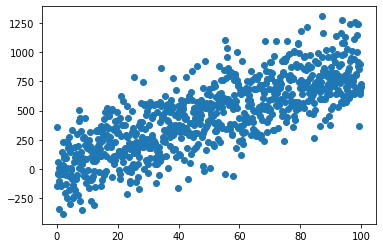

In [438]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 100, 800)
y = 8*x + np.random.normal(x, 200) # y = 8*x + epsilon with epsilon ~ N(0,1)
plt.scatter(x, y)
plt.show()

In [439]:
x = x[:, np.newaxis] # to set x as a matrix of row vectors of 1 feature b

In [440]:
def split_n_batch_indexes(X, nb_chunks=5):
    import numpy as np
    indexes = np.arange(len(X))
    shuffled_indexes = np.random.shuffle(indexes)
    return np.array_split(indexes, nb_chunks)

In [441]:
class Neuron:
    """ Implementation of a single Neuron accepting multiple inputs """
    def __init__(self, X, y, nb_epochs=100, nb_batches=5, 
                 learning_rate=0.01, activation="linear"):
        self.X, self.y = X, y
        # random weights
        self.W = np.random.random(size=(X.shape[1], 1))
        # random bias (only one as only one output)
        self.B = np.random.random(size=(1, 1))
        # number of epochs
        self.nb_epochs = nb_epochs
        # number of batches 
        self.nb_batches = nb_batches
        # learning rate
        self.learning_rate = learning_rate
        # activation
        if activation=="linear":
            self.activation = lambda x: x
            self.derivative = lambda x: 1
        # records
        self.records = {}
                
    def forward_pass(self, is_batch):
        """ a single forward pass to compute a prediction """
        self.y_pred_batch = self.activation( self.X[is_batch] @ self.W + self.B)
        self.y_pred = self.activation( self.X @ self.W + self.B)
        
    def compute_mse_on_whole_dataset(self):
        """ return the mean squared errors on whole training set"""
        self.mse = np.mean((self.y - self.y_pred)**2)
        
    def backpropagation(self, is_batch):
        """ compute the gradient of the errors with respect to 
        the weights using the chain rule """
        # gradient of the errors w.r.t the output/prediction
        dE_dout = 2*(self.y_pred_batch - self.y[is_batch, np.newaxis])
        # gradient of the prediction w.r.t before the activ. func
        dout_dz = self.derivative(self.X[is_batch]) #1 for linear
        # gradient of z w.r.t the weight
        dz_dw = self.X[is_batch]
        # final gradient w.r.t the weights:
        self.dE_dw = dE_dout * dout_dz * dz_dw
        # for the biases (only last part change)
        self.dE_db = dE_dout * dout_dz * 1        
    
    def update_weights_and_biases(self):
        dE_dw = self.dE_dw.mean(axis=0)[:, np.newaxis]
        dE_db = self.dE_db.mean(axis=0)[:, np.newaxis]
        
        self.W = self.W - self.learning_rate * dE_dw
        self.B = self.B - self.learning_rate * dE_db


    def predict(self, X_test):
        """ same as forward pass, just provide our own X"""
        return self.activation( X_test @ self.W + self.B)
    
    def run(self):
        """ learn iteratively:
            - an iteration is a single forward and backward pass
            - an epoch is consumed when all the inputs from the 
              dataset have been used for updating the weight and 
              biases """
        # epochs
        for i in range(1, self.nb_epochs):
            # batches: 
            for batch_i, indices in enumerate(
                    split_n_batch_indexes(self.X, self.nb_batches)):
                self.forward_pass(indices)
                self.compute_mse_on_whole_dataset()
                self.backpropagation(indices)
                self.update_weights_and_biases()
                self.records[(i, batch_i)] = [self.W, self.B, self.mse]
        return self.records

In [442]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [443]:
neuron = Neuron(X_train, y_train)
neuron

In [444]:
records = neuron.run()

In [445]:
import pandas as pd
index = pd.MultiIndex.from_tuples(records.keys())
records = pd.DataFrame(records.values(), 
            index=index,
            columns=['weights', 'bias', 'mse_train'])
records

weights                    bias      mse_train
1  0   [[4.443509449033136]]   [[9.644383787235665]]  316078.087993
   1   [[10.21384857348198]]  [[18.956325297600568]]  307829.453673
   2  [[13.829465261075233]]  [[27.481262123908465]]  299653.437801
   3  [[18.483634718716814]]   [[35.58832870180558]]  292329.983030
   4  [[24.778160591422168]]   [[44.41565823450879]]  285568.062128
...                      ...                     ...            ...
99 0  [[257.33337321955196]]  [[457.91336158008875]]  173202.046267
   1   [[256.7620263257349]]   [[457.9678800130618]]  173143.006457
   2    [[256.873731154326]]  [[457.78357255910817]]  172849.289663
   3   [[257.1059056991105]]  [[457.45374334250926]]  172906.655320
   4   [[257.4797445493716]]   [[457.8868223084108]]  173026.140104

[495 rows x 3 columns]

In [446]:
df_weights = records.weights.apply(np.ravel).apply(pd.Series)
df_bias = records.bias.apply(np.ravel).apply(pd.Series)
df_bias.rename(columns = lambda x: "bias_{}".format(x), inplace=True)
df_weights.rename(columns = lambda x: "weights_{}".format(x), inplace=True)
df = pd.concat([df_weights, df_bias], axis=1)

In [447]:
df

weights_0      bias_0
1  0    4.443509    9.644384
   1   10.213849   18.956325
   2   13.829465   27.481262
   3   18.483635   35.588329
   4   24.778161   44.415658
...          ...         ...
99 0  257.333373  457.913362
   1  256.762026  457.967880
   2  256.873731  457.783573
   3  257.105906  457.453743
   4  257.479745  457.886822

[495 rows x 2 columns]

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

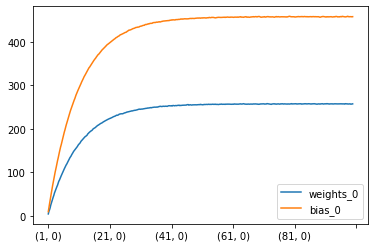

In [448]:
df.plot(kind="line")

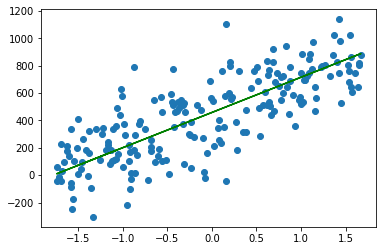

In [449]:
plt.scatter(X_test, y_test)
plt.plot(X_test, neuron.predict(X_test), color='green')

In [451]:
%matplotlib notebook

import matplotlib.animation as animation

fig, ax = plt.subplots()
# Initial plot
x_ = np.linspace(-2, 2, 100).reshape((100,1))
# y_ = weight*x_ + bias
y_ = float(df.iloc[0, 0])*x_ + float(df.iloc[0, 1])

line, = ax.plot(x_, y_, label="Fit from the neuron")

plt.rcParams["figure.figsize"] = (4,2)
plt.ylabel("y")
plt.xlabel("X")
plt.scatter(X_train, y_train, color='red', label="Training data")
plt.scatter(X_test, y_test, color='green', label="Test data")
plt.xlim(-2, 2)
plt.legend()
plt.title("Linear regression training fit using a single neuron | perceptron")

def animate(i):
    line.set_label("Fit from the perceptron : epoch {}".format(i))
    plt.legend()
    x_ = np.linspace(-2, 2, 100).reshape((100,1))
    line.set_xdata(x_)  # update the data
    line.set_ydata( float(df.iloc[i, 0])*x_ 
                   + float(df.iloc[i, 1]))# update the data
    return line,

ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(df)), interval=100)
plt.show()

<IPython.core.display.Javascript object>

# Let's try with multiple features ;-)

In [452]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
lm = LinearRegression().fit(X_train, y_train)
print( "linear regression coefficients {}".format(lm.coef_) )

linear regression coefficients [-0.72097319  1.32905744  0.14098068  0.31901842 -1.9611038   2.39122944
  0.02842854 -3.10284546  2.2339583  -1.52408631 -1.94909087  1.18566169
 -3.79786679]


In [453]:
neuron_on_boston = Neuron(X_train, y_train, 
                          learning_rate=0.1, 
                          nb_batches=1)
records_on_boston = neuron_on_boston.run()

In [454]:
import pandas as pd
index = pd.MultiIndex.from_tuples(records_on_boston.keys())
df_boston = pd.DataFrame(records_on_boston.values(), 
            index=index, columns=['weights', 'bias', 'mse_train'])
df_weights = df_boston.weights.apply(np.ravel).apply(pd.Series)
df_bias = df_boston.bias.apply(np.ravel).apply(pd.Series)
df_bias.rename(columns = lambda x: "bias_{}".format(x), inplace=True)
df_weights.rename(columns = lambda x: "weights_{}".format(x), inplace=True)
df = pd.concat([df_weights, df_bias], axis=1)

In [455]:
%matplotlib inline

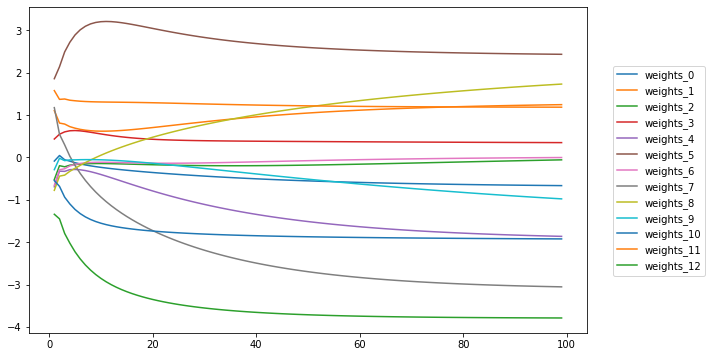

In [456]:
fig = plt.Figure(figsize=(10,6))
ax = fig.gca()
save = df.drop("bias_0", axis=1).stack().unstack(level=0).loc[0].T
save.plot(ax=ax)
ax.legend().remove()
fig.legend(loc='center', bbox_to_anchor=(1,0.5))
fig

In [457]:
at_10  = save.iloc[10]
at_50 = save.iloc[50]
at_98 = save.iloc[98]

<BarContainer object of 13 artists>

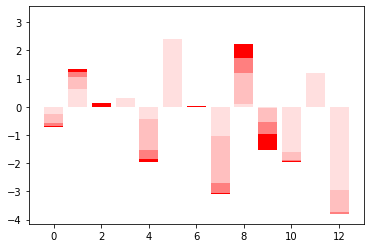

In [458]:
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_10, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_50, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_98, color='white', alpha = 0.5)

# In Keras ? 

In [460]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import pandas as pd

In [461]:
model = Sequential()
model.add(Dense(1, input_shape=(X.shape[1],), activation='linear'))
sgd = optimizers.SGD(lr=0.02)
model.compile(loss='mean_squared_error', optimizer=sgd)

## A callback to store weights

In [462]:
from keras.callbacks import LambdaCallback

weights = {}
def save_weights(epoch, logs):
    weights[epoch] = model.layers[0].get_weights()
    
keep_weights = LambdaCallback(on_epoch_end=save_weights)

In [463]:
history = model.fit(x=X_train, y=y_train, 
                    batch_size=X_train.shape[0], epochs=99, 
                    validation_data=(X_test, y_test), 
                    verbose=0, callbacks=[keep_weights])

{'verbose': 0, 'epochs': 99, 'steps': 1}


<AxesSubplot:>

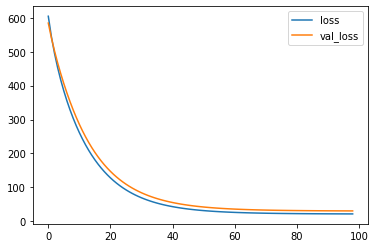

In [464]:
print(history.params)
losses_ = pd.DataFrame(history.history)
losses_.plot(kind="line")

In [465]:
df_weights = pd.DataFrame(weights).T
coefs_linear_reg = dict(zip(
    ["weight_{}".format(_) for _ in range(len(lm.coef_))], 
    lm.coef_ 
))
coefs_linear_reg

{'weight_0': -0.720973185445283,
 'weight_1': 1.3290574386023888,
 'weight_2': 0.14098068438146516,
 'weight_3': 0.3190184199461178,
 'weight_4': -1.9611038002705747,
 'weight_5': 2.3912294381194052,
 'weight_6': 0.028428542130489065,
 'weight_7': -3.1028454604117153,
 'weight_8': 2.2339582985686506,
 'weight_9': -1.5240863072636608,
 'weight_10': -1.949090868280713,
 'weight_11': 1.1856616926433907,
 'weight_12': -3.797866790151385}

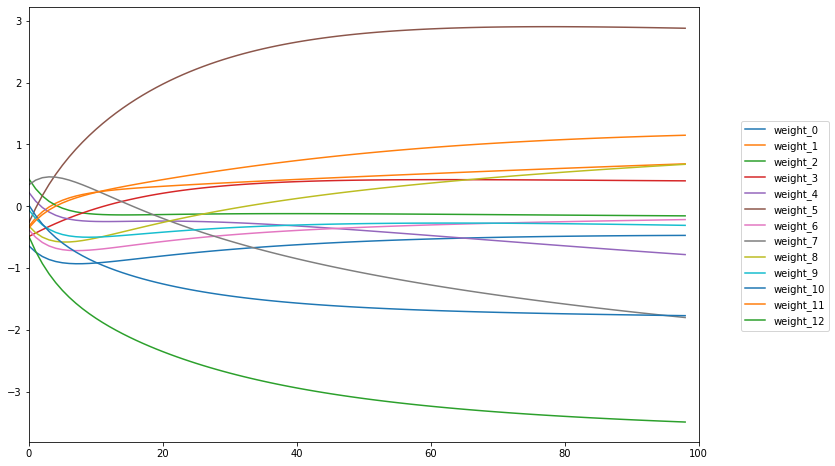

In [466]:
fig, ax = plt.subplots(figsize=(12,8))
( df_weights[0]
     .apply(np.ravel)
     .apply(pd.Series)
     .rename(columns = lambda x: "weight_{}".format(x))
     .plot(kind='line', ax=ax) )
ax.set_xlim(0,100)
ax.legend().remove()
fig.legend(loc='center', bbox_to_anchor=(1, 0.5))

<BarContainer object of 13 artists>

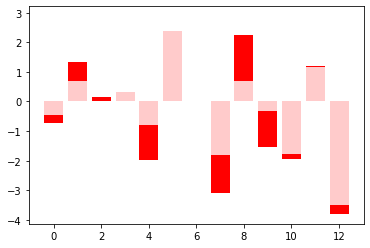

In [467]:
at_98  = df_weights.iloc[98,0].reshape(-1)
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_98, color='white', alpha = 0.8)
#history.model.get_weights()

# Fin.